## GENERATING THE DDBB OF PICTURES TO TRAIN THE MODEL




1. choosing the brush stroke:
    - from the brush stroke data base, randomly select a bs shape, (./data/brush_strokes/00_bs_db/) (1 to n bs's at time)
    - apply transformations (size, rotation degrees, mirror,..) 
    - select a color from the palette  https://stackoverflow.com/questions/28999287/generate-random-colors-rgb
    

2. painting:
    - include the bs in the frame,
    - random location, 
    - retain the new variable "deepness"
    
    
    
  ____  
   
### Notas a tener en cuenta:
    - concentración de pinceladas en el mismo sitio (por el tema de aleatoriedad)
    - trabajar con paletas de colores o randoms que produzcan saltos controlados entre un color y otro (evitar concentración en el mismo color,.. )
    - permitir que se den varias pinceladas en el mismo color (dejando que se elijan 1 o mas bs de cada selección)
    - si existe superposición de colores completa, desestimar el bs que ha desaparecido en su totalidad ocultado por otro posterior.
    - dar un color inicial al fondo
    - formato del frame en el que trabajar, a partir de varios modelos o en modo aleatorio, horizontal,vertical??
    - ...
____________________



## Posible plan B ...¿?


    Crear una especie de app que a partir de una foto de un cuadro + una foto de combinación de colores (reconocer los colores de la foto). Cree un cuadro, similar al de la foto inicial pero con los colores extraidos del input2.
    Generar pinturas, fotos,... etc a partir de colores que se extraen de algún sitio --- mediante foto /video....
 
 



In [7]:
#!pip install colourlovers     descartado, encontrado un punto a seguir que no era este

In [1]:
import numpy as np
import cv2

_____
### NOTA: Ver como se ha desarrollado este proyecto, transmisión de técnica pictórica

https://github.com/matteo-ronchetti/Pointillism/commit/cb6d4454b636488fc2a1993b93f338a2341ba459

____

In [2]:
#https://github.com/matteo-ronchetti/Pointillism/commit/cb6d4454b636488fc2a1993b93f338a2341ba459
# utilizar esta función para repartir las coordenadas de los bs en toda la dimensión del frame, analizarla en detalle, 
#muy útil. Ver si se puede jugar un poco a que el reparto sea mas desigual
import cv2
import random

import matplotlib.pyplot as plt


def randomized_grid(h, w, scale):
    if ( scale==0):
        scale=min(h,w)//3
    assert (scale > 0)

    r = scale//2

    grid = []
    for i in range(0, h, scale):
        for j in range(0, w, scale):
            y = random.randint(-r, r) + i
            x = random.randint(-r, r) + j

            grid.append((y % h, x % w))

    random.shuffle(grid)
    return grid
    
#type(grid)
#len(grid)
#type(grid[0])
def plot_grid(grid):
    x_val = [x[0] for x in grid]
    y_val = [x[1] for x in grid]
    
    plt.scatter(x_val,y_val)
    plt.show()




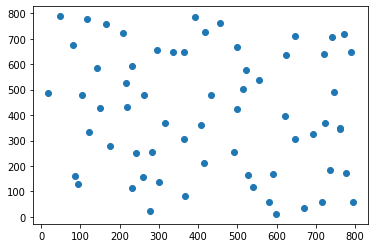

In [3]:
#llamada____________________

grid_g = randomized_grid(h=800, w=800,scale=100)

plot_grid (grid=grid_g)
    

#path_bs='./data/brush_strokes/'
#img = cv2.imread(path_bs + "bs_01.jpg")
#grid = randomized_grid(img.shape[0], img.shape[1], scale=min(img.shape[0],img.shape[1])//5)

#print (img.shape[0],img.shape[1], img.shape[0]*img.shape[1], len(grid))
#print(img.shape[0]*img.shape[1]/len(grid))

## Paleta de colores 

primeros intentos
https://codeboje.de/fun-colors-or-making-art-python/

Palette from picture https://kylermintah.medium.com/coding-a-color-palette-generator-in-python-inspired-by-procreate-5x-b10df37834ae




## para aplicar colores a los bs
https://stackoverflow.com/questions/28999287/generate-random-colors-rgb

##### ver si puedo modificar la selección de colores del modo siguiente:
- elegir los colores de algún sitio (es un plus- plus para despuès, aunque no necesario, pero mola)
- ver si hay características, además del grado de pastel, que se puedan parametrizar
- limitar a colores que se alejen del blanco o negro .. que se alejen de extremos.





In [1]:
#https://gist.github.com/adewes/5884820

import random
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline


def get_random_color(pastel_factor = 0.5):
    return [(x+pastel_factor)/(1.0+pastel_factor) for x in [random.uniform(0,1.0) for i in [1,2,3]]]

def color_distance(c1,c2):
    return sum([abs(x[0]-x[1]) for x in zip(c1,c2)])

def generate_new_color(existing_colors,pastel_factor = 0.5):
    max_distance = None
    best_color = None
    for i in range(0,100):
        color = get_random_color(pastel_factor = pastel_factor)
        if not existing_colors:
            return color
        best_distance = min([color_distance(color,c) for c in existing_colors])
        if not max_distance or best_distance > max_distance:
            max_distance = best_distance
            best_color = color
    return best_color

def generate_palette(n_colors,pastel_factor=0.5):
    palette_color = []

    for i in range(0,n_colors):
        palette_color.append(generate_new_color(palette_color,pastel_factor = pastel_factor))
       # print(palette_color)
    return palette_color  

   

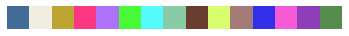

In [2]:
#https://stackoverflow.com/questions/51728957/create-a-color-palette-image-from-a-list-of-rgb-color
#llamada____________________

palette = generate_palette(15,pastel_factor=0.2)

palette_array = np.array(palette)[np.newaxis, :, :]
#print(palette_array)
plt.imshow(palette_array)
plt.axis('off')
plt.show()

In [6]:
palette_array.shape

(1, 15, 3)

### Pintar sobre un frame
- seleccionar frame vertical/horizontal....a partir de unas medidas +- limitadas
- random del número de elementos a pintar (rango limitado)
- random del elemento de nuestra bs_db
- random del número de colores a usar (rango limitado)
- a partir del dato anterior, crear paletta
- pintar en el frame a partir de una selección de centros aleatoria
- 


**Notas**
- si tenemos + puntos que colores, se puede repetir algún color. Coger color aleatorio hasta terminar con los posibles, utilizar todos si los puntos de los bs son <= n_colores en paletta.
- que se puedan seleccionar varias figuras para un mismo color, 1 a n (n puede ser 3-5, testear)



In [7]:
#db of  brush strokes images in list

import os

# folder path
dir_path = './data/brush_strokes/00_bs_db/'

# list to store files
lst_bs = []

# Iterate directory
for path in os.listdir(dir_path):
    # check if current path is a file
    if os.path.isfile(os.path.join(dir_path, path)):
        lst_bs.append(path)
#print(lst_bs, len(lst_bs))


Randomly selected frame size: (600, 400)


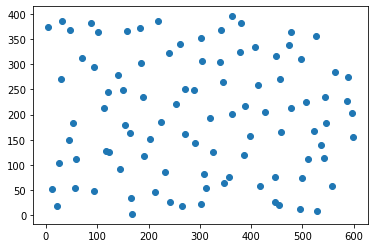

Num de brush strokes 96. Donde las coordenadas de los centroides[(302, 23), (564, 284), (219, 386), (477, 363), (225, 185), (528, 9), (93, 48), (87, 381), (511, 111), (164, 164), (191, 117), (303, 351), (262, 340), (379, 325), (121, 245), (151, 249), (309, 82), (101, 363), (459, 166), (456, 271), (446, 77), (57, 54), (272, 162), (341, 368), (474, 337), (362, 201), (478, 214), (446, 26), (123, 125), (202, 151), (22, 18), (545, 183), (184, 372), (48, 368), (233, 87), (386, 119), (339, 305), (536, 140), (291, 144), (185, 302), (212, 47), (158, 365), (320, 193), (70, 313), (449, 316), (544, 234), (596, 204), (141, 279), (522, 168), (326, 125), (242, 27), (167, 3), (25, 104), (586, 226), (271, 251), (499, 75), (589, 275), (357, 77), (598, 155), (253, 220), (388, 217), (94, 294), (455, 20), (363, 395), (145, 92), (557, 58), (154, 179), (266, 19), (527, 356), (408, 334), (30, 271), (5, 374), (380, 382), (58, 112), (498, 310), (312, 54), (427, 206), (413, 259), (417, 59), (496, 13), (166, 34),

Array con los rgb de la paleta seleccionada [[[0.5301754717827264, 0.983608076776028, 0.8732710952429638], [0.9753597799300467, 0.5232416173517218, 0.4752615530881694], [0.6846084328878341, 0.5153104316195537, 0.9749464896344152], [0.8451144444980528, 0.909263891459829, 0.6204479470003887], [0.5313374709161834, 0.7226990699855648, 0.4775723693010514], [0.972873409093784, 0.6622638817609806, 0.8691042795122493], [0.5625171814847431, 0.47935255538620697, 0.6271790515770314], [0.7858043532960126, 0.8878636299114427, 0.9744047932236877], [0.6466983554907288, 0.7626309010814633, 0.7871074124706025], [0.8248390168035733, 0.5720065915380967, 0.705505475283402], [0.49551989502876714, 0.9810449396335964, 0.5810843864840812], [0.7342665632670538, 0.9884415160398679, 0.7537256167996066], [0.9714588058413192, 0.9961917933228108, 0.898321427117263], [0.5251150242533654, 0.6192569939920523, 0.8411831962366435], [0.9832400615621162, 0.8493163963243016, 0.4825503181580519], [0.7156601203805035, 0.8318

In [13]:
#frame. çTtamaños fijos, tupla con los posibles tamaños, selecc. aleatoria.

lst_frame_sizes=[(600,600),(400,600),(600,400),(800,400),(400,800),(600,200), (200,600)]

import random

#______________frame selection from the list
frame_size=random.choice(lst_frame_sizes)

print("Randomly selected frame size:",frame_size)


bs_centers = randomized_grid(h=frame_size[0], w=frame_size[1],scale=50) # valorar introducir la scale en un random limitado
plot_grid (grid=bs_centers)

print('Num de brush strokes {}. Donde las coordenadas de los centroides{}:'.format(len(bs_centers),bs_centers))


#______________elegir aleatoriamente n=len(bs_centers) centroides donde se van a situar los bs, selección de bs
bs_select=random.sample(lst_bs, len(bs_centers))
print("brush strokes seleccionados de la db de bs:", bs_select)

#______________ seleccionar un angulo para girar la figura [0,360]
lst_degrees=[x for x in range(360)]
degree=random.sample(lst_degrees, len(bs_centers))
print("grados de giro para los bs:", degree)

#______________añadir un cambio en el tamaño del bs en base a un %. Rango elegido :de -30 a 30
lst_pct=[(x) for x in range(100,200)]
lst_scale_percent=random.sample(lst_pct, len(bs_centers))
print("escala de tamaño a aplicar en %:", lst_scale_percent)



#______________colors
palette = generate_palette(len(bs_centers),pastel_factor=0.9)
palette_array = np.array(palette)[np.newaxis, :, :]
plt.imshow(palette_array)
plt.axis('off')
plt.show()
lst_colors=palette_array.tolist()
print('Array con los rgb de la paleta seleccionada {}.'.format(lst_colors))





In [21]:
from PIL import Image
import random

paint_path = './data/brush_strokes/02_paintings/'

def paint_generator (paint_idx):   
    
#random parameters

    lst_frame_sizes=[(600,600),(400,600),(600,400),(800,400),(400,800),(600,200), (200,600)]


    #______________frame selection from the list
    frame_size=random.choice(lst_frame_sizes)

    print("Randomly selected frame size:",frame_size)

    bs_centers = randomized_grid(h=frame_size[0], w=frame_size[1],scale=100) # valorar introducir la scale en un random limitado
    
    plt.axis([0, frame_size[0],0, frame_size[1]])    
    plt.gca().set_aspect('equal', adjustable='box')
    
    plot_grid (grid=bs_centers)

    print('Num de brush strokes {}. Donde las coordenadas de los centroides{}:'.format(len(bs_centers),bs_centers))


    #______________elegir aleatoriamente n=len(bs_centers) centroides donde se van a situar los bs, selección de bs
    bs_select=random.sample(lst_bs, len(bs_centers))
    print("brush strokes seleccionados de la db de bs:", bs_select)

    #______________ seleccionar un angulo para girar la figura [0,360]
    lst_degrees=[x for x in range(360)]
    degree=random.sample(lst_degrees, len(bs_centers))
    print("grados de giro para los bs:", degree)

    #______________añadir un cambio en el tamaño del bs en base a un %. Rango elegido :de -30 a 30
    lst_pct=[(x) for x in range(50,250)]
    lst_scale_percent=random.sample(lst_pct, len(bs_centers))
    print("escala de tamaño a aplicar en %:", lst_scale_percent)

    #______________colors
    palette = generate_palette(len(bs_centers),pastel_factor=0.9)
    palette_array = np.array(palette)[np.newaxis, :, :]
    plt.imshow(palette_array)
    plt.axis('off')
    plt.show()
    lst_colors=palette_array.tolist()
    print('Array con los rgb de la paleta seleccionada {}.'.format(lst_colors))
    
    
#painting

    #generating the frame from frame_size
    blank_image = np.zeros((frame_size[0],frame_size[1],3), np.uint8)
    #adding bs's en bs_centers, en el color de la paleta
    #[0]

    for k in range (len(bs_centers)):

        bs=bs_select[k]
        bs_xy=bs_centers[k]
        bs_color=lst_colors[0][k]
        bs_scale=lst_scale_percent[k]
        bs_angle=degree[k]

        #print ("\n figura bs:",bs,"\n coord:",bs_xy,"\n color:",bs_color,'\n scale:',bs_scale,"\n angle:",bs_angle )
        #blank_image[bs_xy[0],bs_xy[1]]=bs_color

        #rotation
        bs_k_im=Image.open(dir_path + bs)
        rotated=bs_k_im.rotate(bs_angle, expand=True)
        bs_k = np.asarray(rotated)

        #resize
        width = int(bs_k.shape[1] * (1 + bs_scale / 100))
        height = int(bs_k.shape[0] * (1 +  bs_scale / 100))
        #print(bs_k.shape[0],bs_k.shape[1])
        bs_k = cv2.resize(bs_k, (width, height))


        #centramos el bs en el punto donde tenemos que colocarlo
        bs_center=(int(bs_k.shape[0] /2) , int(bs_k.shape[1] /2))
        adjust=(bs_xy[0]-bs_center[0],bs_xy[1]-bs_center[1])

        rgb_tresh=200
        (x,y) = np.where((bs_k[:,:, 0] > rgb_tresh) & (bs_k[ :,:, 1] > rgb_tresh) & (bs_k[:, :, 2] >  rgb_tresh))
        (x,y) = (x + adjust[0], y + adjust[1] )


        #implot = plt.imshow(blank_image)

        #plt.axis('equal')
        plt.xlim(0, frame_size[0]) 
        plt.ylim(0, frame_size[1])
        plt.scatter(x,y,color=lst_colors[0][k])


        #plt.show()
        #bs_k_im
    plt.savefig(paint_path + "paint_" + ("0"*4 + str(paint_idx))[-5:]  + ".png")
    return 




    
    
    

Randomly selected frame size: (400, 800)


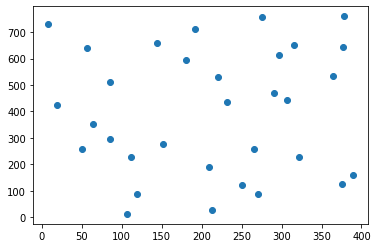

Num de brush strokes 32. Donde las coordenadas de los centroides[(152, 276), (232, 435), (364, 534), (181, 594), (376, 124), (85, 295), (144, 660), (213, 26), (64, 353), (322, 227), (192, 710), (107, 12), (119, 88), (19, 425), (85, 511), (377, 645), (8, 729), (276, 758), (291, 471), (209, 188), (220, 531), (50, 257), (265, 258), (316, 650), (271, 86), (297, 614), (378, 760), (307, 442), (389, 159), (112, 227), (56, 638), (250, 122)]:
brush strokes seleccionados de la db de bs: ['bsu_00154.jpg', 'bsu_00030.jpg', 'bsu_00045.jpg', 'bsu_00023.jpg', 'bsu_00155.jpg', 'bsu_00031.jpg', 'bsu_00136.jpg', 'bsu_00078.jpg', 'bsu_00185.jpg', 'bsu_00107.jpg', 'bsu_00044.jpg', 'bsu_00097.jpg', 'bsu_00072.jpg', 'bsu_00025.jpg', 'bsu_00117.jpg', 'bsu_00104.jpg', 'bsu_00068.jpg', 'bsu_00042.jpg', 'bsu_00177.jpg', 'bsu_00032.jpg', 'bsu_00075.jpg', 'bsu_00098.jpg', 'bsu_00194.jpg', 'bsu_00010.jpg', 'bsu_00043.jpg', 'bsu_00047.jpg', 'bsu_00001.jpg', 'bsu_00176.jpg', 'bsu_00039.jpg', 'bsu_00033.jpg', 'bsu_00

Array con los rgb de la paleta seleccionada [[[0.4864883235785065, 0.5289724137276485, 0.591217697900221], [0.9858054677818262, 0.9390418738876749, 0.9878438978092428], [0.7121760673680045, 0.9613913564418807, 0.5101944276262712], [0.7967007230319919, 0.47522923238126163, 0.9574444138840214], [0.5253423453922134, 0.8150603590743115, 0.9147612384641768], [0.9795485858772307, 0.5775008149881391, 0.5004787410640211], [0.6689975683098163, 0.6292010133014041, 0.7753749984335879], [0.8631577638929395, 0.7919505712054895, 0.6570729213285662], [0.7626972841605918, 0.9747916649573537, 0.8540617975128187], [0.4963860436931776, 0.8601435105398157, 0.562710644822735], [0.999539714593219, 0.4739812578773088, 0.7808889649044548], [0.8486413024037117, 0.7306662695893488, 0.9848200520324188], [0.6122812505419736, 0.6276418757517049, 0.4777947828423465], [0.5524957020994458, 0.5107569464894463, 0.9919766721409782], [0.5468662503189551, 0.740545826450194, 0.6974162523056403], [0.505729366105738, 0.99989

In [ ]:
paint_generator(1)

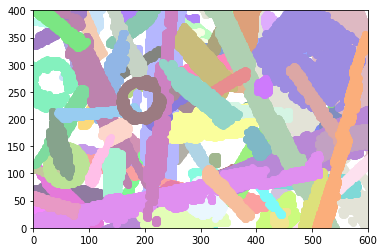

In [15]:
# el siguiente código hace la selección, transformaciones y pintado de un bs unitario
# hay que terminar recogiendo la info del eje "layer deepness", para almacenarlo en el array de salida.


from PIL import Image


#generating the frame from frame_size
blank_image = np.zeros((frame_size[0],frame_size[1],3), np.uint8)
#adding bs's en bs_centers, en el color de la paleta
#[0]

for k in range (len(bs_centers)):

    bs=bs_select[k]
    bs_xy=bs_centers[k]
    bs_color=lst_colors[0][k]
    bs_scale=lst_scale_percent[k]
    bs_angle=degree[k]

    #print ("\n figura bs:",bs,"\n coord:",bs_xy,"\n color:",bs_color,'\n scale:',bs_scale,"\n angle:",bs_angle )
    #blank_image[bs_xy[0],bs_xy[1]]=bs_color

    #rotation
    bs_k_im=Image.open(dir_path + bs)
    rotated=bs_k_im.rotate(bs_angle, expand=True)
    bs_k = np.asarray(rotated)

    #resize
    width = int(bs_k.shape[1] * (1 + bs_scale / 100))
    height = int(bs_k.shape[0] * (1 +  bs_scale / 100))
    #print(bs_k.shape[0],bs_k.shape[1])
    bs_k = cv2.resize(bs_k, (width, height))


    #centramos el bs en el punto donde tenemos que colocarlo
    bs_center=(int(bs_k.shape[0] /2) , int(bs_k.shape[1] /2))
    adjust=(bs_xy[0]-bs_center[0],bs_xy[1]-bs_center[1])

    rgb_tresh=200
    (x,y) = np.where((bs_k[:,:, 0] > rgb_tresh) & (bs_k[ :,:, 1] > rgb_tresh) & (bs_k[:, :, 2] >  rgb_tresh))
    (x,y) = (x + adjust[0], y + adjust[1] )


    #implot = plt.imshow(blank_image)

    #plt.axis('equal')
    plt.xlim(0, frame_size[0]) 
    plt.ylim(0, frame_size[1])
    plt.scatter(x,y,color=lst_colors[0][k])
   
    
    #plt.show()
    #bs_k_im


In [183]:
frame_size[0]
frame_size[1]

600

In [133]:
blue[1]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 2, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 2, 2, 1, 0, 0, 0, 0, 0],
      dtype=uint8)

In [32]:
print(bs_xy[1],
bs_center[1])

print('blank image: {} / imagen shape {} / centro imagen {} / imagen scale {} '.format(blank_image.shape,bs_k.shape,bs_xy,bs_scale))





244 27
blank image: (600, 400, 3) / imagen shape (135, 55, 3) / centro imagen (505, 244) / imagen scale 4 


In [34]:
#https://stackoverflow.com/questions/14063070/overlay-a-smaller-image-on-a-larger-image-python-opencv

def overlay_image_alpha(img, img_overlay, x, y, alpha_mask=None):
    """Overlay `img_overlay` onto `img` at (x, y) and blend using optional `alpha_mask`.

    `alpha_mask` must have same HxW as `img_overlay` and values in range [0, 1].
    """

    if y < 0 or y + img_overlay.shape[0] > img.shape[0] or x < 0 or x + img_overlay.shape[1] > img.shape[1]:
        y_origin = 0 if y > 0 else -y
        y_end = img_overlay.shape[0] if y < 0 else min(img.shape[0] - y, img_overlay.shape[0])

        x_origin = 0 if x > 0 else -x
        x_end = img_overlay.shape[1] if x < 0 else min(img.shape[1] - x, img_overlay.shape[1])

        img_overlay_crop = img_overlay[y_origin:y_end, x_origin:x_end]
        alpha = alpha_mask[y_origin:y_end, x_origin:x_end] if alpha_mask is not None else None
    else:
        img_overlay_crop = img_overlay
        alpha = alpha_mask

    y1 = max(y, 0)
    y2 = min(img.shape[0], y1 + img_overlay_crop.shape[0])

    x1 = max(x, 0)
    x2 = min(img.shape[1], x1 + img_overlay_crop.shape[1])

    img_crop = img[y1:y2, x1:x2]
    img_crop[:] = alpha * img_overlay_crop + (1.0 - alpha) * img_crop if alpha is not None else img_overlay_crop

In [35]:
overlay_image_alpha(blank_image,bs_k,adjust[0],adjust[1],alpha_mask=None)
Image.fromarray(blank_image).save("img_result_borrar.jpg")

ValueError: could not broadcast input array from shape (135,17,3) into shape (135,0,3)

In [33]:
plt.imshow(img_crop)
#plt.imshow(bs_k)
print (adjust[0],adjust[1])


NameError: name 'img_crop' is not defined

In [37]:
import cv2

def merge_image(back, front, x,y):
    # convert to rgba
    if back.shape[2] == 3:
        back = cv2.cvtColor(back, cv2.COLOR_BGR2BGRA)
    if front.shape[2] == 3:
        front = cv2.cvtColor(front, cv2.COLOR_BGR2BGRA)

    # crop the overlay from both images
    bh,bw = back.shape[:2]
    fh,fw = front.shape[:2]
    x1, x2 = max(x, 0), min(x+fw, bw)
    y1, y2 = max(y, 0), min(y+fh, bh)
    front_cropped = front[y1-y:y2-y, x1-x:x2-x]
    back_cropped = back[y1:y2, x1:x2]

    alpha_front = front_cropped[:,:,3:4] / 255
    alpha_back = back_cropped[:,:,3:4] / 255
    
    # replace an area in result with overlay
    result = back.copy()
    print(f'af: {alpha_front.shape}\nab: {alpha_back.shape}\nfront_cropped: {front_cropped.shape}\nback_cropped: {back_cropped.shape}')
    result[y1:y2, x1:x2, :3] = alpha_front * front_cropped[:,:,:3] + (1-alpha_front) * back_cropped[:,:,:3]
    result[y1:y2, x1:x2, 3:4] = (alpha_front + alpha_back) / (1 + alpha_front*alpha_back) * 255

    return result

af: (0, 54, 1)
ab: (0, 54, 1)
front_cropped: (0, 54, 4)
back_cropped: (0, 54, 4)


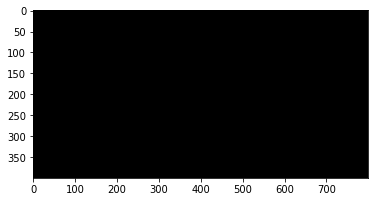

In [41]:
aa=merge_image(blank_image,bs_k,adjust[0],adjust[1])

plt.imshow(aa)


In [151]:
blank_image[1:10,1:20] +=[]

matplotlib.collections.PathCollection

In [145]:
import numpy as np
import matplotlib.pyplot as plt
import imageio
from contextlib import contextmanager

@contextmanager
def plot_over(img, extent=None, origin="upper", dpi=100):
    h, w, d = img.shape
    assert d == 3
    if extent is None:
        xmin, xmax, ymin, ymax = -0.5, w + 0.5, -0.5, h + 0.5
    else:
        xmin, xmax, ymin, ymax = extent
    if origin == "upper":
        ymin, ymax = ymax, ymin
    elif origin != "lower":
        raise ValueError("origin must be 'upper' or 'lower'")
    fig = plt.figure(figsize=(w / dpi, h / dpi), dpi=dpi)
    ax = plt.Axes(fig, (0, 0, 1, 1))
    ax.set_axis_off()
    ax.set_xlim(xmin, xmax)
    ax.set_ylim(ymin, ymax)
    fig.add_axes(ax)
    fig.set_facecolor((0, 0, 0, 0))
    yield ax
    fig.canvas.draw()
    plot = np.frombuffer(fig.canvas.buffer_rgba(), dtype=np.uint8).reshape(h, w, 4)
    plt.close(fig)
    rgb = plot[..., :3]
    alpha = plot[..., 3, None]
    img[...] = ((255 - alpha) * img.astype(np.uint16) + alpha * rgb.astype(np.uint16)) // 255

img = imageio.imread("image.jpg")
img_with_plot = img.copy()
with plot_over(img_with_plot) as ax:
    ax.scatter(...)
    # etc
imageio.imwrite("result.png", img_with_plot)

error: OpenCV(4.3.0) /io/opencv/modules/core/src/arithm.cpp:666: error: (-209:Sizes of input arguments do not match) The operation is neither 'array op array' (where arrays have the same size and the same number of channels), nor 'array op scalar', nor 'scalar op array' in function 'arithm_op'


In [9]:
import matplotlib.pyplot as plt
im = plt.imread(dir_path + bs_select[k])
implot = plt.imshow(im)

# put a blue dot at (10, 20)
plt.scatter([10], [20])

# put a red dot, size 40, at 2 locations:
plt.scatter(x=[30, 40], y=[50, 60], c='r', s=40)

plt.show()

NameError: name 'k' is not defined

In [143]:
#lst_f= [x,y for x,y in (x,y)  if x>0 ]
frame_size
type(x)
frame_size
adjust[1]
type(bs_k_im)

PIL.JpegImagePlugin.JpegImageFile

In [55]:




print(bs_center)
adjust=(bs_xy[0]-bs_center[0],bs_xy[1]-bs_center[1])
adjust


(95, 90)


(51, -5)

191 181


(array([ 58,  60,  61, ..., 226, 226, 227]),
 array([94, 94, 94, ..., 81, 82, 79]))

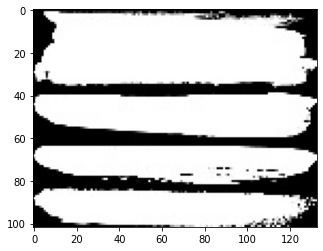

In [57]:
1 +  bs_scale / 100
print(bs_k.shape[0],bs_k.shape[1])
plt.imshow(bs_k_im)
(x,y)

[94 94 94 ... 81 82 79]


'bsu_00018.jpg'

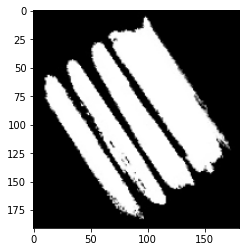

In [39]:

plt.imshow(bs_k)
bs

In [45]:
bs_color
bs_xy
bs
bs_scale
bs_angle

bs_k
bs_scale
bs_angle
bs_xy

(146, 85)

In [10]:
lst_size_pct=[(x-5)/100 for x in range(11)]
lst_size_pct

[-0.05, -0.04, -0.03, -0.02, -0.01, 0.0, 0.01, 0.02, 0.03, 0.04, 0.05]

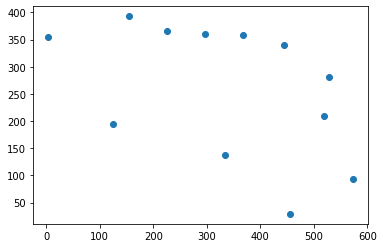

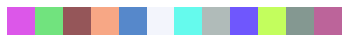

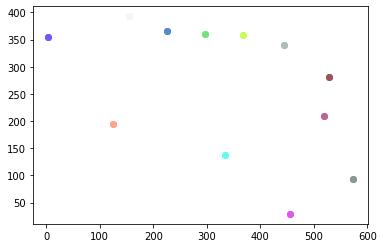

In [108]:
#vamos añadiendo los bs, localizando los puntos de las mask en el frame y añadiendo colores.....
#el primero
#tener  en cuenta el tamaño de los bs, aunque luego se manipula, todos tienen que tener un tamaño limitado en la base
#https://stackoverflow.com/questions/33287156/specify-color-of-each-point-in-scatter-plot-matplotlib

plot_grid (grid=bs_centers)

#plt.scatter (bs_centers[0][0],bs_centers[0][1])
#plt.scatter (list(zip(*bs_centers))[0],list(zip(*bs_centers))[1])
plt.imshow(palette_array)
plt.axis('off')
plt.show()

for k in range(len(bs_centers)):
    plt.scatter (list(zip(*bs_centers))[0][k],list(zip(*bs_centers))[1][k],color=lst_colors[0][k])

for k in range(len(bs_centers)):
    plt.scatter (list(zip(*bs_centers))[0][k],list(zip(*bs_centers))[1][k],color=lst_colors[0][k])


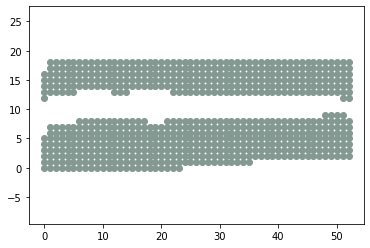

In [163]:
# nota_1  https://levelup.gitconnected.com/how-to-approach-image-overlay-problems-ad2d4a8e22bc
k=10

image_1 = cv2.imread(dir_path + bs_select[k])
image_1 = (255-image_1)
gray = cv2.cvtColor(image_1, cv2.COLOR_BGR2GRAY) #to gray scale
blur = cv2.GaussianBlur(gray, (3,3), 0)
thresh  = cv2.threshold(blur, 225, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
#print(image_1)

#convertir de vuelta el thresh a rgb
backtorgb = cv2.cvtColor(thresh,cv2.COLOR_GRAY2RGB)
cv2.imwrite("test_borrar.jpg", backtorgb)


#(x, y) = np.where((backtorgb[:,:, 0] ==0) & (backtorgb[ :,:, 1]==0) & (backtorgb[:, :, 2]==0))
#plt.scatter(x, y,color=lst_colors[0][k])

(x,y) = np.where((image_1[:,:, 0] <230) & (image_1[ :,:, 1] <230) & (image_1[:, :, 2] <230))
plt.axis('equal')
plt.scatter(y,x,color=lst_colors[0][k])


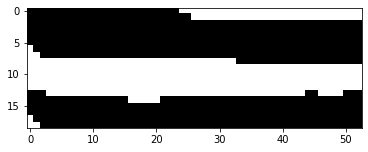

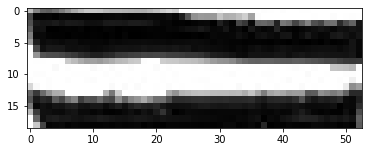

In [164]:
plt.subplot(1,1,1),plt.imshow(backtorgb,'gray',vmin=0,vmax=255)
plt.show()
#plt.title('test')
#plt.xticks([]),plt.yticks([])
plt.subplot(1,1,1),plt.imshow(image_1,'gray',vmin=0,vmax=255)
plt.show()

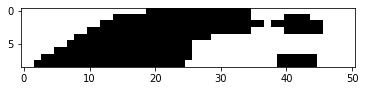

In [86]:
plt.imshow(thresh,'gray',vmin=0,vmax=255)

In [77]:
import matplotlib.pyplot as plt
from matplotlib import colors, cm
import numpy as np

a = np.random.randn(10,10)

norm = colors.normalize()
cmap = cm.hsv
a_colors = cmap(norm(a))

col1 = colors.colorConverter.to_rgba('w')
col2 = colors.colorConverter.to_rgba('k')

a_colors[a<-0.1,:] = col1
a_colors[a>0.1,:] = col2
plt.imshow(a_colors, interpolation='nearest')
plt.show()

AttributeError: module 'matplotlib.colors' has no attribute 'normalize'

In [ ]:
# Aplicar un ratio de tamaño a los bs - percent by which the image is resized
scale_percent = lst_scale_percent(0)

#calculate the 50 percent of original dimensions
width = int(src.shape[1] * scale_percent / 100)
height = int(src.shape[0] * scale_percent / 100)

# dsize
dsize = (width, height)

# resize image
output = cv2.resize(src, dsize)


In [199]:
type(bs_centers) #coordenadas
type(bs_select) #figuras
type(degree) # degrees to apply to figures

type(lst_colors) # colors


list

In [115]:
from PIL import Image, ImageDraw, ImageFilter

#frame_size=random.choice(lst_frame_sizes)
im1 = Image.open('./data/nat_geo.jpg')
bs_file='bsu_00010.jpg'
im2=np.zeros_like(im1) 

im3=Image.open(dir_path + bs_file)
mask = Image.open(dir_path + bs_file).convert('L').resize(im1.size)

im_blend = Image.composite(im1, im2,mask)
im_blend
mask
im3

AttributeError: 'numpy.ndarray' object has no attribute 'paste'

In [ ]:


mask = Image.open('data/src/horse.png').convert('L').resize(im1.size)


im = Image.composite(im1, im2, mask)

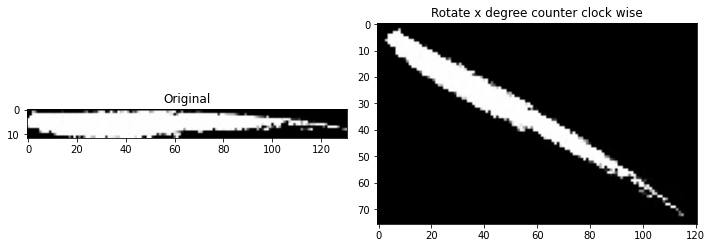

In [287]:

#rotation sample

from PIL import Image
from numpy import asarray
# open image
bs_file='bsu_00023.jpg'
image=Image.open(dir_path + bs_file)
image_cv= cv2.imread(dir_path + bs_file)
# rotate image
rotated=image.rotate(-30, expand=True)
numpydata = asarray(rotated)


plt.figure(figsize=(10,10))
titles = ['Original',"Rotate x degree counter clock wise"]
images = [image_cv,numpydata]

for i in range(2):
    plt.subplot(2,2,i+1)
    plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    plt.title(titles[i])
plt.tight_layout()
plt.show()


In [163]:
degree

[251, 120, 223, 352, 9, 253, 211, 17, 37, 338, 128, 323]